In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


maxlen = 500
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


model = Sequential([
    Embedding(10000, 64, input_length=maxlen),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(46, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_data, train_labels, epochs=5, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_data, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


2110848/2110848 [==============================] - 0s 0us/step
Epoch 1/5
225/225 [==============================] - 221s 966ms/step - loss: 2.3449 - accuracy: 0.4017 - val_loss: 2.0214 - val_accuracy: 0.4930
Epoch 2/5
225/225 [==============================] - 218s 968ms/step - loss: 1.8128 - accuracy: 0.5297 - val_loss: 1.6830 - val_accuracy: 0.5609
Epoch 3/5
225/225 [==============================] - 219s 972ms/step - loss: 1.6235 - accuracy: 0.5784 - val_loss: 1.6251 - val_accuracy: 0.5787
Epoch 4/5
225/225 [==============================] - 217s 962ms/step - loss: 1.4791 - accuracy: 0.6170 - val_loss: 1.5433 - val_accuracy: 0.6155
Epoch 5/5
71/71 [==============================] - 16s 227ms/step - loss: 1.5910 - accuracy: 0.5993
Test accuracy: 0.5992876291275024
Error percentage: 40.071237087249756


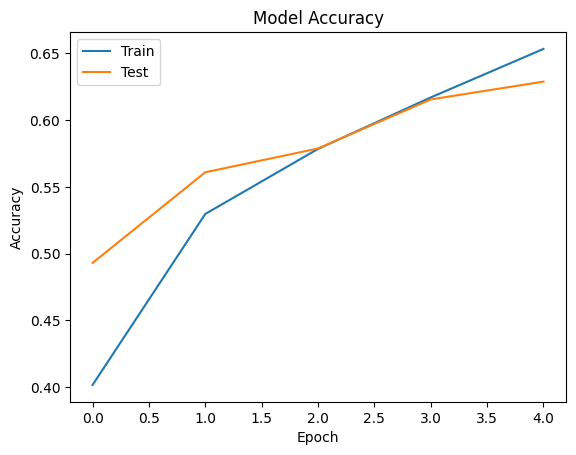

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


71/71 [==============================] - 16s 228ms/step - loss: 1.5910 - accuracy: 0.5993


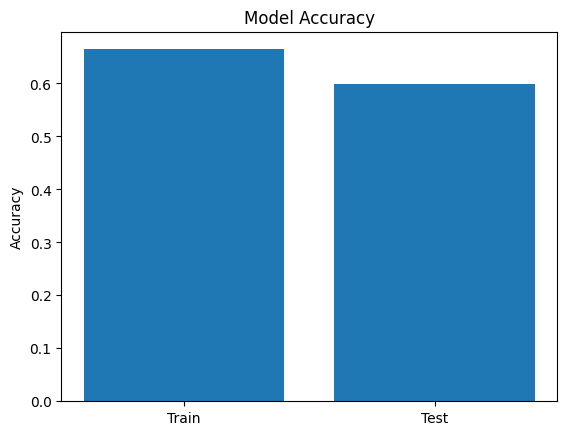

In [ ]:
import matplotlib.pyplot as plt



train_loss, train_acc = model.evaluate(train_data, train_labels)
test_loss, test_acc = model.evaluate(test_data, test_labels)

plt.bar(['Train', 'Test'], [train_acc, test_acc])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()
